In [9]:
import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [10]:
data = pd.read_csv("C:/Users/Sumukh Kashi/Downloads/bank_marketing.csv",na_values = ["?"])

In [11]:
data.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
summary_cate = data.describe(include = "O")
print(summary_cate)

               job  marital  education default housing  loan   contact month  \
count         5581     5581       5581    5581    5581  5581      5581  5581   
unique          12        3          4       2       2     2         3    12   
top     management  married  secondary      no      no    no  cellular   may   
freq          1318     3134       2719    5497    2928  4863      4044  1407   

       poutcome deposit  
count      5581    5581  
unique        4       2  
top     unknown      no  
freq       4133    2959  


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5581 entries, 0 to 5580
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5581 non-null   int64 
 1   age         5581 non-null   int64 
 2   job         5581 non-null   object
 3   marital     5581 non-null   object
 4   education   5581 non-null   object
 5   default     5581 non-null   object
 6   balance     5581 non-null   int64 
 7   housing     5581 non-null   object
 8   loan        5581 non-null   object
 9   contact     5581 non-null   object
 10  day         5581 non-null   int64 
 11  month       5581 non-null   object
 12  duration    5581 non-null   int64 
 13  campaign    5581 non-null   int64 
 14  pdays       5581 non-null   int64 
 15  previous    5581 non-null   int64 
 16  poutcome    5581 non-null   object
 17  deposit     5581 non-null   object
dtypes: int64(8), object(10)
memory usage: 785.0+ KB


In [15]:
average = data[data["deposit"] == "yes"]["age"].mean()
print(average)

41.42677345537757


In [16]:
max_num = data[data["deposit"] == "no"]["campaign"].value_counts()

In [27]:
print(max_num)

1     1105
2      816
3      376
4      234
5      140
6       80
7       47
8       45
9       30
10      14
13      10
11       9
12       9
14       7
15       6
21       4
18       3
24       3
16       2
19       2
17       2
22       2
26       1
20       1
28       1
30       1
32       1
23       1
25       1
27       1
31       1
33       1
41       1
43       1
63       1
Name: campaign, dtype: int64


In [28]:
subYes = data[data["deposit"] == "yes"]["balance"].sum()

In [29]:
print(subYes)

4555837


In [30]:
subNo = data[data["deposit"] == "no"]["balance"].sum()
print(subNo)

3897909


In [31]:
res= subYes - subNo
print(res)

657928


In [33]:
print(np.unique(data["job"]))

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [35]:
data[data["job"] == "management"].value_counts()

Unnamed: 0  age  job         marital  education  default  balance  housing  loan  contact   day  month  duration  campaign  pdays  previous  poutcome  deposit
3           34   management  single   tertiary   no       1396     yes      no    cellular  17   jul    630       1         -1     0         unknown   no         1
3847        63   management  married  tertiary   no       3115     no       no    cellular  16   nov    432       5         -1     0         unknown   yes        1
3844        26   management  single   tertiary   no       6840     yes      no    unknown   28   may    1560      2         -1     0         unknown   yes        1
3839        53   management  married  tertiary   no       37       no       no    cellular  28   aug    51        9         -1     0         unknown   no         1
3836        44   management  married  tertiary   no       1138     no       no    cellular  27   aug    523       3         -1     0         unknown   yes        1
                     

In [36]:
nope = data[data["deposit"] == "no"].value_counts()

In [37]:
print(nope)

Unnamed: 0  age  job          marital  education  default  balance  housing  loan  contact   day  month  duration  campaign  pdays  previous  poutcome  deposit
0           41   services     married  unknown    no       88       yes      no    cellular  11   may    105       1          336   2         failure   no         1
3677        37   blue-collar  married  secondary  no       13849    yes      no    unknown   23   may    252       5         -1     0         unknown   no         1
3660        36   blue-collar  married  primary    no       409      yes      no    unknown   11   jun    81        3         -1     0         unknown   no         1
3662        34   management   married  tertiary   no       101      yes      no    cellular  13   aug    209       5         -1     0         unknown   no         1
3663        27   admin.       single   tertiary   no       73       no       no    cellular  29   jan    242       1         -1     0         unknown   no         1
               

In [39]:
yep = data[data["deposit"] == "yes"].value_counts()
print(yep)

Unnamed: 0  age  job          marital   education  default  balance  housing  loan  contact   day  month  duration  campaign  pdays  previous  poutcome  deposit
1           56   technician   married   secondary  no       1938     no       yes   cellular  26   feb    229       1          192   4         success   yes        1
3782        52   services     married   secondary  no       1000     no       no    cellular  5    aug    766       2         -1     0         unknown   yes        1
3754        34   technician   married   tertiary   no       127      no       no    cellular  3    jun    117       1         -1     0         unknown   yes        1
3755        22   admin.       single    secondary  no       114      no       no    cellular  30   mar    517       1         -1     0         unknown   yes        1
3757        49   technician   married   secondary  no       808      yes      no    cellular  28   jan    1232      1         -1     0         unknown   yes        1
         

In [41]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Density'>

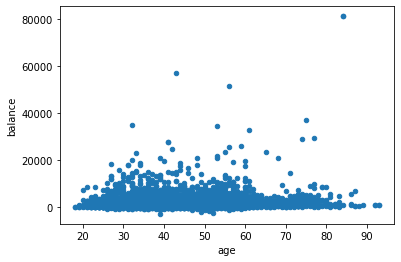

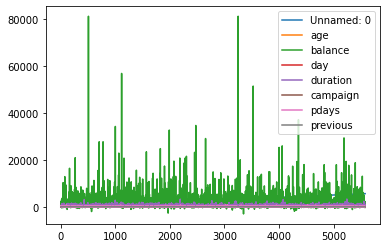

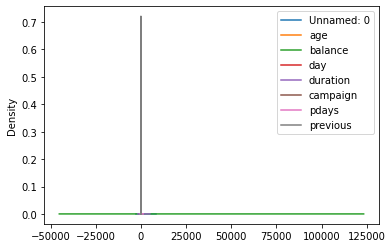

In [44]:
data.plot(kind = "scatter", x = "age", y = "balance")
data.plot()
data.plot(kind = "density")

In [17]:
umemp_sub = data[data["deposit"] == "yes"]["job"].value_counts()
print(umemp_sub)

management       669
technician       406
blue-collar      346
admin.           306
retired          255
services         189
student          129
self-employed    103
unemployed        92
housemaid         60
entrepreneur      55
unknown           12
Name: job, dtype: int64


In [3]:
x1 = pd.get_dummies(data.drop(columns = ["Unnamed: 0"]), drop_first = True)
y1 = data["Unnamed: 0"]


NameError: name 'pd' is not defined

In [96]:
train_x, train_y, test_x, test_y = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [97]:
from sklearn.neighbors import KNeighborsClassifier  

KNNClassifier = KNeighborsClassifier(n_neighbors = 7)

In [98]:
KNNClassifier.fit(train_x, train_y)
KNN_model = KNNClassifier.pred(test_y)

ValueError: Found input variables with inconsistent numbers of samples: [3906, 1675]

In [99]:
train_x, train_y, test_x, test_y = train_test_split(X, Y, test_size = 0.3, random_state=1)
log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(train_x, train_y)
log_regress = log_reg.predict(test_y)
accuracyScore = accuracy_score(test_y, log_regress)
print(accuracyScore)

ValueError: y should be a 1d array, got an array of shape (1675, 43) instead.

In [100]:
y = data.drop(['Unnamed: 0'], axis='columns', inplace=True)
print(y)

KeyError: "['Unnamed: 0'] not found in axis"

In [101]:
data1 = pd.get_dummies(data, columns = ['age', 'job' ,'marital' , 'education' ,'default' ,'balance','housing','loan','contact','day','month', 'duration','campaign','pdays','previous','poutcome','deposit'], drop_first= True)

KeyError: "None of [Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',\n       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',\n       'previous', 'poutcome', 'deposit'],\n      dtype='object')] are in the [columns]"

In [1]:
4%7

4

In [2]:
1%2

1

In [4]:
2 | 3


3

In [5]:
1| 3

3

In [7]:
4|3

7